In [1]:
### Importing Necessery Libraries and Modules..
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

In [2]:
### Loading the Data..
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3359,3623-FQBOX,Male,0,No,No,21,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.95,416.4,No
3696,3144-AUDBS,Female,0,Yes,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,49.15,270.8,Yes
1712,6303-KFWSL,Female,0,No,No,29,Yes,Yes,DSL,No,...,No,No,No,No,One year,Yes,Electronic check,55.25,1620.2,No
2987,3769-MHZNV,Female,0,Yes,Yes,33,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.10,670.35,No
807,2798-NYLMZ,Male,0,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),108.55,7616,No


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
### In our dataset there is no null value..

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### EDA

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='tenure'>

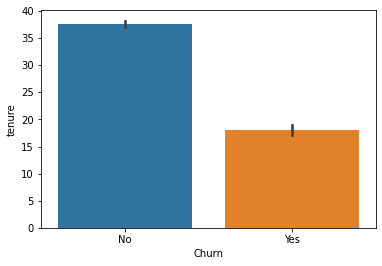

In [7]:
sns.barplot(df['Churn'],df['tenure'])

<AxesSubplot:xlabel='Churn', ylabel='Count'>

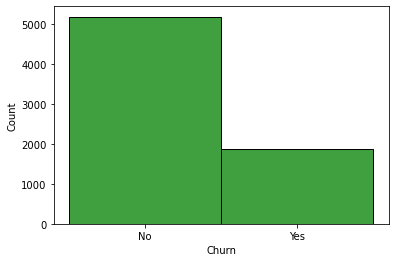

In [8]:
sns.histplot(df['Churn'],color='green')

### Feature Engineering..

In [9]:
df['TotalCharges'].dtype

dtype('O')

- We need to convert the data type of this column as numbers should be integer or float type..

- pd.to_numeric(df['TotalCharges'])
- can't do it directly as this column contains some empty string or non-convertabel strings.
- let's findout those rows..
- errors=**'coerce'** will replace the errors with Null values..

In [10]:
pd.to_numeric(df['TotalCharges'],errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [11]:
df[pd.to_numeric(df['TotalCharges'],errors='coerce').isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
### Excluding those rows which contains Null value in the TotalCharges column..
df=df[~pd.to_numeric(df['TotalCharges'],errors='coerce').isnull()]

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'])

In [15]:
df['TotalCharges'].dtype

dtype('float64')

In [16]:
df['PhoneService'].value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

In [17]:
df['MultipleLines'].value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

In [18]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [19]:
df['OnlineSecurity'].value_counts()

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

In [20]:
df['DeviceProtection'].value_counts()

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64

In [21]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

In [22]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [23]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [24]:
df.shape

(7032, 21)

In [25]:
### Customer Id column is not so useful..So,it is better to drop the column
df.drop(columns=['customerID'],axis=1,inplace=True)

In [26]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [27]:
### Let's check all the unique values in each column..
for col in df:
    print(f'{col} : {df[col].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

### Let's replace 'No Internet/Phone Service' with No..

In [28]:
for col in df:
    if df[col].dtype=='object':
        print(f'{col} : {df[col].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


- **df.replace({'No phone service':'No'},inplace=True)**
- **df.replace({'No internet service':'No'},inplace=True)**
> Easier way..

In [29]:
df['MultipleLines'].replace({'No phone service':'No'},inplace=True)
df['OnlineSecurity'].replace({'No internet service':'No'},inplace=True)
df['OnlineBackup'].replace({'No internet service':'No'},inplace=True)
df['DeviceProtection'].replace({'No internet service':'No'},inplace=True)
df['TechSupport'].replace({'No internet service':'No'},inplace=True)
df['StreamingTV'].replace({'No internet service':'No'},inplace=True)
df['StreamingMovies'].replace({'No internet service':'No'},inplace=True)

In [30]:
for col in df:
    if df[col].dtype=='object':
        print(f'{col} : {df[col].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [31]:
df.replace({'Yes':1,'No':0},inplace=True)
df.replace({'Male':1,'Female':0},inplace=True)

In [32]:
for col in df:
    if df[col].dtype=='float':
        print(f'{col} : {df[col].unique()}')

MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]


In [33]:
for col in df:
    if df[col].dtype=='int64':
        print(f'{col} : {df[col].unique()}')

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
PaperlessBilling : [1 0]
Churn : [0 1]


In [34]:
for col in df:
    if df[col].dtype=='object':
        print(f'{col} : {df[col].unique()}')

InternetService : ['DSL' 'Fiber optic' 0]
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


- Now let's convert all the remaining object type values into numeric values using one hot encoding..(pd.get_dummies() method.)

In [35]:
df2=df.copy()

In [36]:
ndf=pd.merge(df2,pd.get_dummies(df,columns=['InternetService','Contract','PaymentMethod'],drop_first=True))

In [37]:
ndf.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,DSL,0,1,...,29.85,29.85,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,DSL,1,0,...,56.95,1889.50,0,1,0,1,0,0,0,1
2,1,0,0,0,2,1,0,DSL,1,1,...,53.85,108.15,1,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,DSL,1,0,...,42.30,1840.75,0,1,0,1,0,0,0,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,...,70.70,151.65,1,0,1,0,0,0,1,0


In [38]:
ndf.drop(columns=['InternetService','Contract','PaymentMethod'],axis=1,inplace=True)

In [39]:
ndf.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,1,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,1,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,0,1,0,0,0,1,0


In [40]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7120 entries, 0 to 7119
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7120 non-null   int64  
 1   SeniorCitizen                          7120 non-null   int64  
 2   Partner                                7120 non-null   int64  
 3   Dependents                             7120 non-null   int64  
 4   tenure                                 7120 non-null   int64  
 5   PhoneService                           7120 non-null   int64  
 6   MultipleLines                          7120 non-null   int64  
 7   OnlineSecurity                         7120 non-null   int64  
 8   OnlineBackup                           7120 non-null   int64  
 9   DeviceProtection                       7120 non-null   int64  
 10  TechSupport                            7120 non-null   int64  
 11  Stre

In [41]:
ndf.sample(3).transpose()

,1311,6483,5977
gender,0.00,0.0,1.00
SeniorCitizen,0.00,0.0,0.00
Partner,0.00,0.0,0.00
Dependents,0.00,0.0,0.00
tenure,2.00,55.0,10.00
PhoneService,0.00,1.0,1.00
MultipleLines,0.00,1.0,0.00
OnlineSecurity,0.00,0.0,1.00
OnlineBackup,0.00,0.0,0.00
DeviceProtection,0.00,0.0,0.00


### Let's scale down those columns which contains non-binary digits..

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scalar=MinMaxScaler()

In [44]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']

In [45]:
ndf[cols_to_scale].head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [46]:
scalar.fit_transform(ndf[cols_to_scale])

array([[0.        , 0.11542289, 0.0012751 ],
       [0.46478873, 0.38507463, 0.21586661],
       [0.01408451, 0.35422886, 0.01031041],
       ...,
       [0.14084507, 0.11293532, 0.03780868],
       [0.04225352, 0.55870647, 0.03321025],
       [0.91549296, 0.86965174, 0.78764136]])

In [47]:
ndf[cols_to_scale]=scalar.fit_transform(ndf[cols_to_scale])

In [48]:
ndf.sample(3).transpose()

,2924,4988,5453
gender,0.000000,0.000000,0.000000
SeniorCitizen,0.000000,0.000000,0.000000
Partner,1.000000,1.000000,1.000000
Dependents,0.000000,1.000000,1.000000
tenure,0.352113,0.802817,0.915493
PhoneService,1.000000,1.000000,1.000000
MultipleLines,1.000000,0.000000,0.000000
OnlineSecurity,0.000000,0.000000,1.000000
OnlineBackup,1.000000,0.000000,0.000000
DeviceProtection,0.000000,0.000000,0.000000


In [49]:
### Now all the values are in 0 to 1 Range..

### Data Splitting and Model Building..

In [50]:
X=ndf.drop(columns='Churn',axis=1)
y=ndf['Churn']

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [53]:
X_train.shape

(5696, 23)

In [54]:
model=keras.Sequential([
    keras.layers.Dense(units=25,input_shape=(X_train.shape[1],),activation='relu'),
    keras.layers.Dense(units=15,activation='relu'),
    keras.layers.Dense(units=1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=50)

Epoch 1/50
178/178 [==============================] - 0s 659us/step - loss: 0.5178 - accuracy: 0.7410
Epoch 2/50
178/178 [==============================] - 0s 654us/step - loss: 0.4321 - accuracy: 0.7986
Epoch 3/50
178/178 [==============================] - 0s 654us/step - loss: 0.4215 - accuracy: 0.8007
Epoch 4/50
178/178 [==============================] - 0s 654us/step - loss: 0.4177 - accuracy: 0.8051
Epoch 5/50
178/178 [==============================] - 0s 682us/step - loss: 0.4157 - accuracy: 0.8048
Epoch 6/50
178/178 [==============================] - 0s 676us/step - loss: 0.4141 - accuracy: 0.8050
Epoch 7/50
178/178 [==============================] - 0s 676us/step - loss: 0.4115 - accuracy: 0.8065
Epoch 8/50
178/178 [==============================] - 0s 654us/step - loss: 0.4103 - accuracy: 0.8069
Epoch 9/50
178/178 [==============================] - 0s 654us/step - loss: 0.4110 - accuracy: 0.8109
Epoch 10/50
178/178 [==============================] - 0s 654us/step - loss: 0.409

In [55]:
pred=model.predict(X_test)

In [56]:
pred[0]

array([0.06241009], dtype=float32)

In [57]:
actual_pred=[]
for i in pred:
    if i>0.5:
        actual_pred.append(1)
    else:
        actual_pred.append(0)

In [58]:
actual_pred[:5]

[0, 0, 1, 0, 0]

In [59]:
y_test[:5]

4423    0
6520    0
6173    1
3485    0
4034    1
Name: Churn, dtype: int64

In [60]:
from sklearn.metrics import classification_report,confusion_matrix

In [61]:
print(confusion_matrix(y_test,actual_pred))
print(classification_report(y_test,actual_pred))

[[944  95]
 [199 186]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1039
           1       0.66      0.48      0.56       385

    accuracy                           0.79      1424
   macro avg       0.74      0.70      0.71      1424
weighted avg       0.78      0.79      0.78      1424



Text(87.0, 0.5, 'True_Value')

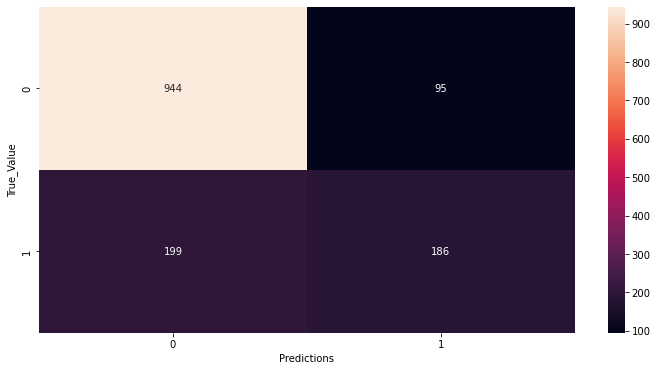

In [62]:
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_test,actual_pred),annot=True,fmt='d')
plt.xlabel('Predictions')
plt.ylabel('True_Value')

In [63]:
model.evaluate(X_test,y_test)

45/45 [==============================] - 0s 582us/step - loss: 0.4410 - accuracy: 0.7935


[0.4409794211387634, 0.7935393452644348]